In [1]:
from sklearn.model_selection import train_test_split, GroupShuffleSplit
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('data/merged_data.csv')

In [3]:
df.head()

,transcript_id,transcript_position,sequence,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0


In [4]:
# make +1, -1 flanks into new row

# extract +1, -1 flanks and central
fixed_columns = ["transcript_id", "gene_id", "transcript_position", "sequence", "label"]
positive_flank  = df[fixed_columns + ["+1_flank_length", "+1_flank_std", "+1_flank_mean"]]
negative_flank  = df[fixed_columns + ["-1_flank_length", "-1_flank_std", "-1_flank_mean"]]
central = df[fixed_columns + ["central_length", "central_std", "central_mean"]]

# rename columns and change transcript position
positive_flank.columns = fixed_columns + ["length", "std", "mean"]
positive_flank = positive_flank.copy()
positive_flank["transcript_position"] = positive_flank["transcript_position"] + 1

# rename columns and change transcript position
negative_flank.columns = fixed_columns + ["length", "std", "mean"]
negative_flank = positive_flank.copy()
negative_flank["transcript_position"] = negative_flank["transcript_position"] - 1

# rename columns
central.columns = fixed_columns + ["length", "std", "mean"]

# merge
merged_df = pd.concat([positive_flank, negative_flank, central])
merged_df.head()

,transcript_id,gene_id,transcript_position,sequence,label,length,std,mean
0,ENST00000000233,ENSG00000004059,245,AAGACCA,0,0.00930,10.90,84.1
1,ENST00000000233,ENSG00000004059,245,AAGACCA,0,0.01030,6.30,80.9
2,ENST00000000233,ENSG00000004059,245,AAGACCA,0,0.00498,2.13,79.6
3,ENST00000000233,ENSG00000004059,245,AAGACCA,0,0.00498,3.78,80.4
4,ENST00000000233,ENSG00000004059,245,AAGACCA,0,0.01300,7.15,82.2


In [5]:
# clear RAM
del df, positive_flank, negative_flank, central

In [6]:
merged_df['seq'] = merged_df['sequence'].str[1:6]

In [7]:
holder = merged_df["seq"].values.reshape(-1, 1)

# One Hot Encoding
label_encoder = LabelEncoder()
temp = pd.DataFrame(label_encoder.fit_transform(holder))
temp.columns = ["seq_le"]

merged_df = merged_df.join(temp)

c:\Users\joeyl\miniconda3\envs\DSA4266\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
# clear RAM
del temp, holder

In [9]:
merged_df.head()

,transcript_id,gene_id,transcript_position,sequence,label,length,std,mean,seq,seq_le
0,ENST00000000233,ENSG00000004059,245,AAGACCA,0,0.0093,10.9,84.1,AGACC,4
0,ENST00000000233,ENSG00000004059,244,AAGACCA,0,0.0093,10.9,84.1,AGACC,4
0,ENST00000000233,ENSG00000004059,244,AAGACCA,0,0.0177,10.4,122.0,AGACC,4
1,ENST00000000233,ENSG00000004059,245,AAGACCA,0,0.0103,6.3,80.9,AGACC,4
1,ENST00000000233,ENSG00000004059,244,AAGACCA,0,0.0103,6.3,80.9,AGACC,4


In [10]:
group_split = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(group_split.split(merged_df, groups=merged_df['gene_id']))

train = merged_df.iloc[train_idx]
test = merged_df.iloc[test_idx]

In [11]:
train.head()

,transcript_id,gene_id,transcript_position,sequence,label,length,std,mean,seq,seq_le
0,ENST00000000233,ENSG00000004059,245,AAGACCA,0,0.0093,10.9,84.1,AGACC,4
0,ENST00000000233,ENSG00000004059,244,AAGACCA,0,0.0093,10.9,84.1,AGACC,4
0,ENST00000000233,ENSG00000004059,244,AAGACCA,0,0.0177,10.4,122.0,AGACC,4
1,ENST00000000233,ENSG00000004059,245,AAGACCA,0,0.0103,6.3,80.9,AGACC,4
1,ENST00000000233,ENSG00000004059,244,AAGACCA,0,0.0103,6.3,80.9,AGACC,4


## balance train data

In [12]:
train = train.drop(["transcript_id", "sequence", "gene_id", "seq"], axis=1)

In [13]:
num_false = len(train[train['label'] == 0])
num_true = len(train[train['label'] == 1])
print(num_false)
print(num_true)

24982083
1151835


In [14]:
ratio = num_true/num_false
print(ratio)

0.04610644356597486


In [15]:
# Calculate the number of negative samples to keep (~5%)
num_negatives_to_keep = int(ratio * len(train[train['label'] == 0]))

train_sampled_negative = train[train['label'] == 0].sample(n=num_negatives_to_keep)
print("here")
train = pd.concat([train_sampled_negative, train[train['label'] == 1]])

here


       transcript_position      label        length           std  \
count         2.303670e+06  2303670.0  2.303670e+06  2.303670e+06   
mean          1.339740e+03        0.5  7.533868e-03  3.708723e+00   
std           1.127335e+03        0.5  4.812540e-03  2.391703e+00   
min           3.000000e+00        0.0  1.660000e-03  2.200000e-01   
25%           6.150000e+02        0.0  4.320000e-03  2.110000e+00   
50%           1.072000e+03        0.5  6.310000e-03  2.940000e+00   
75%           1.774000e+03        1.0  9.300000e-03  4.480000e+00   
max           1.868100e+04        1.0  9.700000e-02  1.500000e+02   

               mean        seq_le  
count  2.303670e+06  2.303670e+06  
mean   9.549298e+01  8.411959e+00  
std    1.495730e+01  4.695975e+00  
min    6.420000e+01  0.000000e+00  
25%    8.530000e+01  5.000000e+00  
50%    9.070000e+01  9.000000e+00  
75%    1.010000e+02  1.100000e+01  
max    1.470000e+02  1.700000e+01  


<Axes: xlabel='label'>

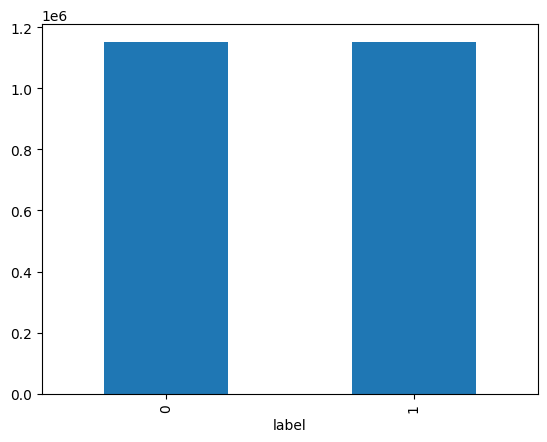

In [16]:
# Reset the index of the DataFrame (optional)
train.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(train.describe())
train['label'].value_counts().plot(kind='bar')

# normalize dataset

In [18]:
train.head()

,transcript_position,label,length,std,mean,seq_le
0,482,0,0.00533,4.02,84.2,6
1,597,0,0.00896,1.86,82.7,15
2,1929,0,0.00654,2.10,91.7,14
3,1504,0,0.00478,1.74,94.7,8
4,607,0,0.00531,2.31,96.9,2


In [19]:
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(train)
print(d)

[[0.02564514 0.         0.03849381 0.02537054 0.24154589 0.35294118]
 [0.03180212 0.         0.07656807 0.01094939 0.22342995 0.88235294]
 [0.10311597 0.         0.05118523 0.01255174 0.3321256  0.82352941]
 ...
 [0.08186101 1.         0.07656807 0.02316731 0.18599034 0.52941176]
 [0.08180747 1.         0.07656807 0.02316731 0.18599034 0.52941176]
 [0.08180747 1.         0.05569541 0.02456937 0.61352657 0.52941176]]


In [20]:
train = pd.DataFrame(d, columns=train.columns)

In [21]:
train.head()

,transcript_position,label,length,std,mean,seq_le
0,0.025645,0.0,0.038494,0.025371,0.241546,0.352941
1,0.031802,0.0,0.076568,0.010949,0.223430,0.882353
2,0.103116,0.0,0.051185,0.012552,0.332126,0.823529
3,0.080362,0.0,0.032725,0.010148,0.368357,0.470588
4,0.032338,0.0,0.038284,0.013954,0.394928,0.117647


In [22]:
import pickle

# save the model to a file
with open('minmax_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# # load the model from the file
# with open('minmax_scaler.pkl', 'rb') as f:
#     scaler = pickle.load(f)

In [23]:
train.to_csv('data/longer_train.csv', index=False)

In [24]:
# clear RAM
del train

In [25]:
test = test.drop(["transcript_id", "sequence", "gene_id", "seq"], axis=1)

In [26]:
d = scaler.transform(test)
test = pd.DataFrame(d, columns=test.columns)
test.head()

,transcript_position,label,length,std,mean,seq_le
0,0.025056,0.0,0.090623,0.022700,0.333333,1.0
1,0.025003,0.0,0.090623,0.022700,0.333333,1.0
2,0.025003,0.0,0.114747,0.065963,0.722222,1.0
3,0.025056,0.0,0.198657,0.031112,0.339372,1.0
4,0.025003,0.0,0.198657,0.031112,0.339372,1.0


In [27]:
test.to_csv('data/longer_test.csv', index=False)